## Naive Bayes

In [ ]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MachineLearningProject/ML_Exam_Module3/cleaned_data.csv')

NameError: name 'pd' is not defined

In [ ]:
#cleaned_dataset
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Version,Android Version
0,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4
1,Paper flowers instructions,Art And Design,4.4,167,5734.4,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1,2.3
2,Infinite Painter,Art And Design,4.1,36815,29696.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2
3,Garden Coloring Book,Art And Design,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0
4,Text on Photo - Fonteee,Art And Design,4.4,13880,28672.0,1000000,Free,0.0,Everyone,Art & Design,2017-10-27,1.0.4,4.1
5,Name Art Photo Editor - Focus n Filters,Art And Design,4.4,8788,12288.0,1000000,Free,0.0,Everyone,Art & Design,2018-07-31,1.0.15,4.0
6,Tattoo Name On My Photo Editor,Art And Design,4.2,44829,20480.0,10000000,Free,0.0,Teen,Art & Design,2018-04-02,3.8,4.1
7,Mandala Coloring Book,Art And Design,4.6,4326,21504.0,100000,Free,0.0,Everyone,Art & Design,2018-06-26,1.0.4,4.4
8,3D Color Pixel by Number - Sandbox Art Coloring,Art And Design,4.4,1518,37888.0,100000,Free,0.0,Everyone,Art & Design,2018-08-03,1.2.3,2.3
9,Photo Designer - Write your name with shapes,Art And Design,4.7,3632,5632.0,500000,Free,0.0,Everyone,Art & Design,2018-07-31,3.1,4.1


### Multinominal Naive Bayes

In [ ]:
#Label data for high and low installs
df['Install_Label'] = df['Installs'].apply(lambda x: 'high' if x > 500000 else 'low')

In [ ]:
#features and target variable
X = df[['Rating', 'Reviews', 'Size']]
y = df['Install_Label']

#Scale features to prepare them for Multinomial Naive Bayes
scaler = MinMaxScaler(feature_range=(1, 10))
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
train_data = pd.DataFrame(X_train, columns=['Rating', 'Reviews', 'Size'])
train_data['Install_Label'] = y_train.reset_index(drop=True)

test_data = pd.DataFrame(X_test, columns=['Rating', 'Reviews', 'Size'])
test_data['Install_Label'] = y_test.reset_index(drop=True)

In [ ]:
print("Training Data:")
print(train_data.head(10))

Training Data:
     Rating   Reviews      Size Install_Label
0  8.200000  1.003763  2.079343          high
1  8.200000  1.300180  3.969499          high
2  7.975000  1.001256  1.152266          high
3  7.075000  1.001444  3.879492          high
4  8.650000  1.110788  3.609470          high
5  9.325000  1.004772  1.014459           low
6  7.075000  1.000001  1.701311           low
7  8.875000  1.000001  1.044169           low
8  9.100000  1.034610  2.259357          high
9  8.185011  1.000000  1.404286           low


In [ ]:
print("\nTest Data:")
print(test_data.head(10))


Test Data:
     Rating   Reviews      Size Install_Label
0  8.185011  1.000001  1.152266           low
1  8.875000  1.021596  1.584301          high
2  7.300000  1.004915  2.979417          high
3  7.300000  1.000006  1.179268           low
4  8.200000  1.004541  1.134264          high
5  8.185011  1.000000  1.989335           low
6  7.525000  1.000216  1.746315           low
7  7.975000  1.057303  2.349365          high
8  9.550000  1.000020  1.404286           low
9  7.975000  1.000043  3.699477           low


In [ ]:
#Initialize and fit the model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
#predict on test data
y_pred_mnb = mnb.predict(X_test)

In [ ]:
#Evaluate the model
print("Multinomial Naive Bayes Accuracy:\n", accuracy_score(y_test, y_pred_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))

Multinomial Naive Bayes Accuracy:
 0.696551724137931
Confusion Matrix:
 [[101 392]
 [ 48 909]]


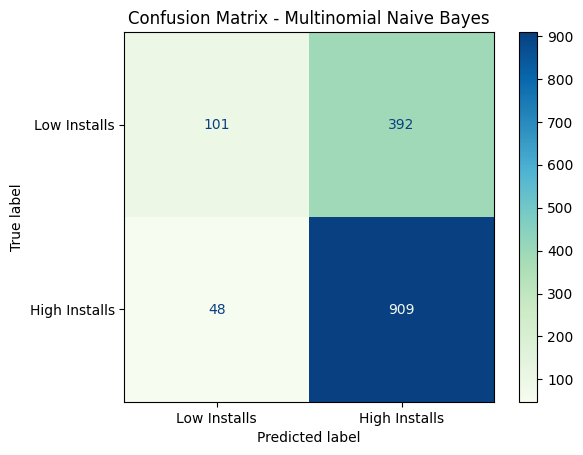

In [ ]:
#confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_mnb,
    display_labels=['Low Installs', 'High Installs'],
    cmap='GnBu',
    colorbar=True
)
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.show()

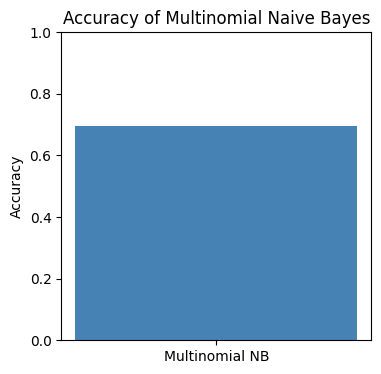

In [ ]:
#accuracy
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)

plt.figure(figsize=(4, 4))
plt.bar(['Multinomial NB'], [accuracy_mnb], color='steelblue')
plt.ylim(0, 1)
plt.title('Accuracy of Multinomial Naive Bayes')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Classification Report for Multinomial NB
print("Classification Report for Multinomial Naive Bayes:")
print(classification_report(y_test, y_pred_mnb, target_names=['Low Installs', 'High Installs']))


Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

 Low Installs       0.68      0.20      0.31       493
High Installs       0.70      0.95      0.81       957

     accuracy                           0.70      1450
    macro avg       0.69      0.58      0.56      1450
 weighted avg       0.69      0.70      0.64      1450



### Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer

In [ ]:
# Binarize features
binarizer = Binarizer(threshold=3.5)  # Example threshold
X_binarized = binarizer.fit_transform(X)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_binarized, y, test_size=0.2, random_state=42)


In [ ]:
# Train and evaluate BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)


In [ ]:
print("Bernoulli Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_bnb))

Bernoulli Naive Bayes Accuracy: 0.66


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))

Confusion Matrix:
 [[  0 493]
 [  0 957]]


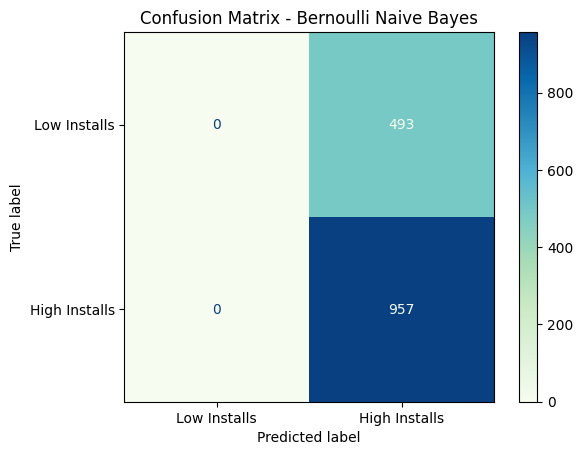

In [ ]:
#confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_bnb,
    display_labels=['Low Installs', 'High Installs'],
    cmap='GnBu',
    colorbar=True
)
plt.title("Confusion Matrix - Bernoulli Naive Bayes")
plt.show()

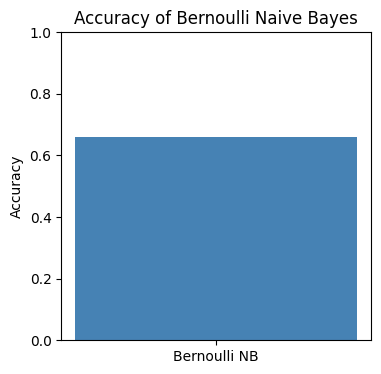

In [ ]:
# Accuracy
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)

# Plot Accuracy
plt.figure(figsize=(4, 4))
plt.bar(['Bernoulli NB'], [accuracy_bnb], color='steelblue')
plt.ylim(0, 1)
plt.title('Accuracy of Bernoulli Naive Bayes')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# Classification Report for Bernoulli NB
print("Classification Report for Bernoulli Naive Bayes:")
print(classification_report(y_test, y_pred_bnb, target_names=['Low Installs', 'High Installs']))


Classification Report for Bernoulli Naive Bayes:
               precision    recall  f1-score   support

 Low Installs       0.00      0.00      0.00       493
High Installs       0.66      1.00      0.80       957

     accuracy                           0.66      1450
    macro avg       0.33      0.50      0.40      1450
 weighted avg       0.44      0.66      0.52      1450



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [ ]:
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))

Gaussian Naive Bayes Accuracy: 0.9103448275862069
Confusion Matrix:
 [[375 118]
 [ 12 945]]


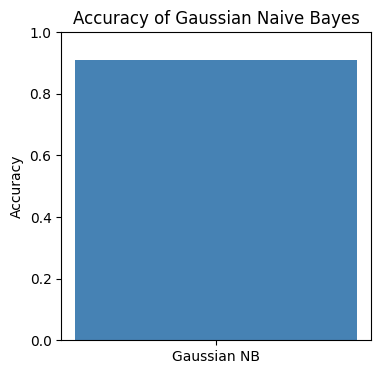

In [ ]:
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

# Plot Accuracy
plt.figure(figsize=(4, 4))
plt.bar(['Gaussian NB'], [accuracy_gnb], color='steelblue')
plt.ylim(0, 1)
plt.title('Accuracy of Gaussian Naive Bayes')
plt.ylabel('Accuracy')
plt.show()


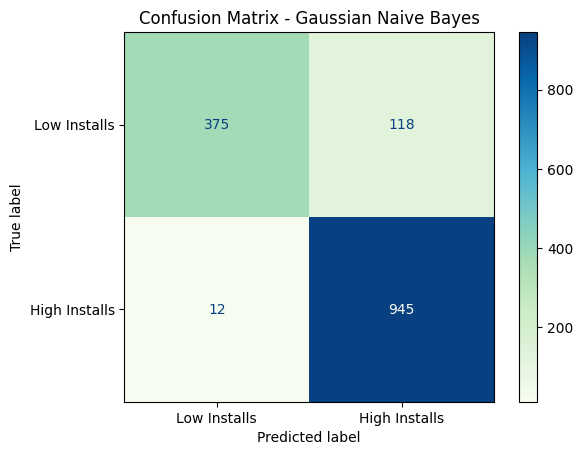

In [ ]:
#confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_gnb,
    display_labels=['Low Installs', 'High Installs'],
    cmap='GnBu',
    colorbar=True
)
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()

In [ ]:
print("Classification Report for Gaussian Naive Bayes:")
print(classification_report(y_test, y_pred_gnb, target_names=['Low Installs', 'High Installs']))

Classification Report for Gaussian Naive Bayes:
               precision    recall  f1-score   support

 Low Installs       0.97      0.76      0.85       493
High Installs       0.89      0.99      0.94       957

     accuracy                           0.91      1450
    macro avg       0.93      0.87      0.89      1450
 weighted avg       0.92      0.91      0.91      1450



### Comparison

In [ ]:
# Accuracies for all models
accuracies = {
     'Bernoulli NB': accuracy_bnb,
    'Multinomial NB': accuracy_mnb,
      'Gaussian NB': accuracy_gnb
}

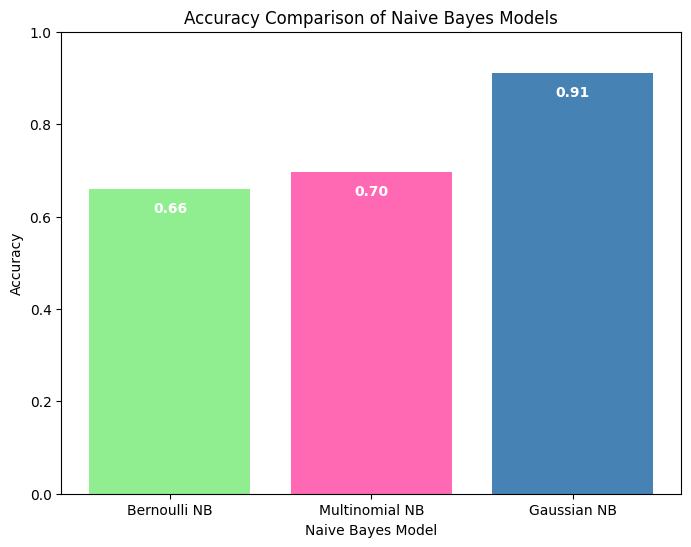

In [ ]:
plt.figure(figsize=(8, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['lightgreen', 'hotpink', 'steelblue'])
plt.ylim(0, 1)
plt.title('Accuracy Comparison of Naive Bayes Models')
plt.ylabel('Accuracy')
plt.xlabel('Naive Bayes Model')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{bar.get_height():.2f}', ha='center', color='white', fontweight='bold')

plt.show()
